In [179]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [180]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [181]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, inspect, func, distinct

In [182]:
# create engine to hawaii.sqlite
engine = create_engine('sqlite:///Resources/hawaii.sqlite')

In [183]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [184]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [185]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [186]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [187]:
# Use Inspector to print the column names and types for measurement table
inspector = inspect(engine)
mcolumns = inspector.get_columns('measurement')
for c in mcolumns:
    print(c['name'], c['type'])
    


id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [188]:
# Use Inspector to print the column names and types for station table
inspector = inspect(engine)
scolumns = inspector.get_columns('station')
for c in scolumns:
    print(c['name'], c['type'])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


# Exploratory Precipitation Analysis

In [189]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results.

In [190]:
# Find the most recent date in the data set.
recent_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
recent_date

('2017-08-23',)

In [191]:
 # Starting from the most recent data point in the database. 
start_date = dt.date(2017, 8, 23)
# Calculate the date one year from the last date in data set.
one_year_prior = start_date - dt.timedelta(days=365)

# Perform a query to retrieve the data and precipitation scores
precipitation = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= one_year_prior).all()

# Save the query results as a Pandas DataFrame and set the index to the date column
prcp_df = pd.DataFrame(precipitation, columns = ['Date', 'Precipitation'])
prcp_df.set_index('Date', inplace=True)

# Sort the dataframe by date
prcp_sorted = prcp_df.sort_values(by=['Date'])
prcp_sorted.head()

,Precipitation
Date,
2016-08-23,0.00
2016-08-23,NaN
2016-08-23,1.79
2016-08-23,0.05
2016-08-23,0.15


C:\Users\c_ris\anaconda3\envs\PythonData\lib\site-packages\pandas\plotting\_matplotlib\core.py:1192: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


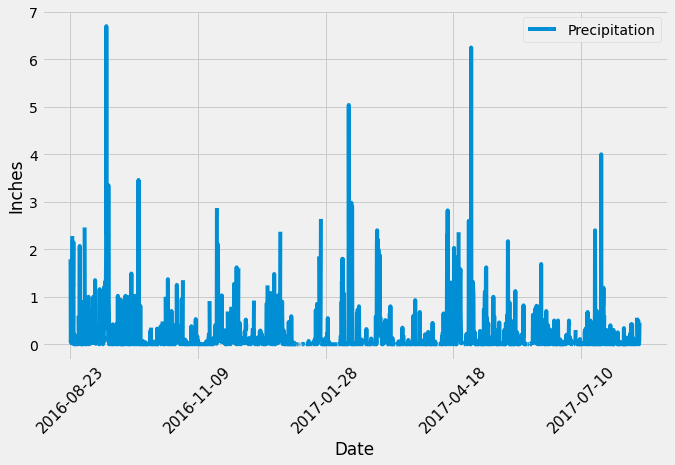

In [192]:
# Use Pandas Plotting with Matplotlib to plot the data
prcp_sorted.plot(figsize=(10,6))
plt.xlabel('Date')
plt.ylabel('Inches')
plt.legend(loc="upper right")
plt.xticks(rotation=45,fontsize=15)
plt.show()


In [193]:
# Use Pandas to calcualte the summary statistics for the precipitation data
prcp_sorted.describe()

,Precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [194]:
# Design a query to calculate the total number stations in the dataset
no_stations = session.query(func.count(distinct(Measurement.station))).scalar()
no_stations

9

In [195]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
session.query(Measurement.station, func.count(Measurement.station)).group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()

# List the stations and the counts in descending order.
most_active_stations = session.query(Measurement.station, func.count(Measurement.station)).group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()
most_active_stations

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [196]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
min_temp = session.query(func.min(Measurement.tobs)).filter(Measurement.station == 'USC00519281').all()
max_temp = session.query(func.max(Measurement.tobs)).filter(Measurement.station == 'USC00519281').all()
avg_temp = session.query(func.avg(Measurement.tobs)).filter(Measurement.station == 'USC00519281').all()
print(min_temp, max_temp, avg_temp)

[(54.0,)] [(85.0,)] [(71.66378066378067,)]


In [197]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

# Perform a query to retrieve the data
active_temp = session.query(Measurement.tobs).filter(Measurement.station == 'USC00519281').filter(Measurement.date >= one_year_prior).all()

# Save the query results as a Pandas DataFrame
temp_df = pd.DataFrame(active_temp, columns = ['TOBS'])
temp_df.head()


,TOBS
0,77.0
1,77.0
2,80.0
3,80.0
4,75.0


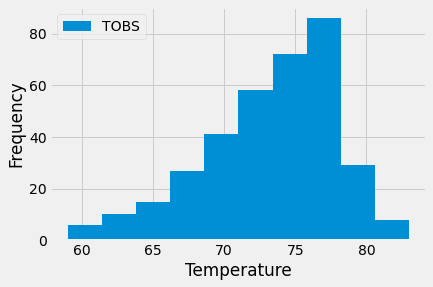

In [198]:
# Plot results to histogram
plt.hist(temp_df)
numb_bins = 12
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.legend(loc="upper left",labels=['TOBS'])
plt.show()

# Close session

In [199]:
# Close Session
session.close()